In [1]:
# import necessary libraries
import datetime as dt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
#import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
df = pd.read_csv('네이버.csv')

In [3]:
# 전체 매출액 하위 TOP 10

df = df[df['매출액'] != 0]

# 각 상품명의 매출액 합계를 계산
Sales_amount_by_item = df.groupby('상품명')['매출액'].sum()

# 매출액이 낮은 순서대로 하위 10개 상품만 선택
sorted_items_lowest_revenue_10 = Sales_amount_by_item.nsmallest(10)

sorted_items_lowest_revenue_10

상품명
[스토어팜] 쁘띠첼요거젤리블루베리250G냉장    1780
[네이버] 비비고칩 오리지널 40g         1980
[네이버] 하선정 멸치액젓 400g         3080
햇반 소프트밀 단호박죽 420G           3270
햇반 컵반 스팸김치덮밥 251G           3370
가쓰오 우동한그릇                   3600
백설 깨찰빵믹스 500g               3850
[네이버] 백설 사리원불고기양념 290G      3880
[네이버] 백설 맛술 로즈마리 800ml      3980
[네이버] 가쓰오우동한그릇              4100
Name: 매출액, dtype: int64

In [4]:
# 전체 매출액 상위 TOP 10

df = df[df['매출액'] != 0]

# 각 상품명의 매출액 합계를 계산
Sales_amount_item = df.groupby('상품명')['매출액'].sum()

# 매출액이 높은 순서대로 상위 10개 상품만 선택
sorted_items_highest_revenue_10 = Sales_amount_item.nlargest(10)

sorted_items_highest_revenue_10

상품명
[네이버] 햇반210Gx36개     598554850
햇반 210Gx24개          333002320
스팸클래식 200Gx10개       231326050
햇반 작은공기130G x 36개    161459740
햇반 발아현미밥 210Gx36개    149440900
햇반 흑미밥 210Gx36개      108403500
햇반큰공기300G x 18개       87173720
햇반 매일잡곡밥 210Gx36개     85592290
다시다 쇠고기 25kg          79493920
햇반 백미 205Gx36개        78895760
Name: 매출액, dtype: int64

In [5]:
import matplotlib.pyplot as plt


# 매출액이 0이 아닌 데이터만 선택합니다.
df = df[df['매출액'] != 0]

revenue_by_item = df.groupby('상품명')['매출액'].sum()

sorted_items_lowest_revenue_10 = revenue_by_item.nsmallest(10)

def get_item_type(item_name):
    if '묶음' in item_name:
        return '묶음상품'
    else:
        return '단일상품'

# 상품 유형 컬럼
sorted_items_lowest_revenue_10_with_type = sorted_items_lowest_revenue_10.reset_index()
sorted_items_lowest_revenue_10_with_type['상품유형'] = sorted_items_lowest_revenue_10_with_type['상품명'].apply(get_item_type)

# 정렬된 상품명, 매출액, 상품 유형
print(sorted_items_lowest_revenue_10_with_type)

                        상품명   매출액  상품유형
0  [스토어팜] 쁘띠첼요거젤리블루베리250G냉장  1780  단일상품
1       [네이버] 비비고칩 오리지널 40g  1980  단일상품
2       [네이버] 하선정 멸치액젓 400g  3080  단일상품
3         햇반 소프트밀 단호박죽 420G  3270  단일상품
4         햇반 컵반 스팸김치덮밥 251G  3370  단일상품
5                 가쓰오 우동한그릇  3600  단일상품
6             백설 깨찰빵믹스 500g  3850  단일상품
7    [네이버] 백설 사리원불고기양념 290G  3880  단일상품
8    [네이버] 백설 맛술 로즈마리 800ml  3980  단일상품
9            [네이버] 가쓰오우동한그릇  4100  단일상품


In [6]:
df = df[df['매출액'] != 0]

# 각 상품명의 매출액 합계를 계산
revenue_by_item = df.groupby('상품명')['매출액'].sum()

# 매출액이 높은 순서대로 상위 10개 상품만 선택
sorted_items_highest_revenue_10 = revenue_by_item.nlargest(10)

def get_item_type(item_name):
    if '묶음' in item_name:
        return '묶음상품'
    else:
        return '단일상품'

sorted_items_highest_revenue_10_with_type = sorted_items_highest_revenue_10.reset_index()
sorted_items_highest_revenue_10_with_type['상품유형'] = sorted_items_highest_revenue_10_with_type['상품명'].apply(get_item_type)

print(sorted_items_highest_revenue_10_with_type)

                 상품명        매출액  상품유형
0   [네이버] 햇반210Gx36개  598554850  단일상품
1        햇반 210Gx24개  333002320  단일상품
2     스팸클래식 200Gx10개  231326050  단일상품
3  햇반 작은공기130G x 36개  161459740  단일상품
4  햇반 발아현미밥 210Gx36개  149440900  단일상품
5    햇반 흑미밥 210Gx36개  108403500  단일상품
6    햇반큰공기300G x 18개   87173720  단일상품
7  햇반 매일잡곡밥 210Gx36개   85592290  단일상품
8       다시다 쇠고기 25kg   79493920  단일상품
9     햇반 백미 205Gx36개   78895760  단일상품


### 판매량

In [7]:
item_counts = df['상품명'].value_counts()

# 빈도수가 낮은 순서대로 하위 10개 물건만 선택하여 정렬
sorted_items_bottom_10 = item_counts.nsmallest(10)

print(sorted_items_bottom_10)

[스토어팜] 쁘띠첼요거젤리블루베리250G냉장       1
다담 고깃집된장찌개양념 2KGx2개            1
햇반 컵반 스팸김치덮밥 251Gx18개(1box)    1
[네이버] 밸런스밀 바나나 50Gx5개          1
[네이버] 고메 바삭튀겨낸모짜렐라돈카츠 450G     1
스팸 김밥햄 260Gx3개                 1
[네이버] 가쓰오우동한그릇                 1
[네이버] 미정당 방앗간참쌀 왕떡볶이떡 400G     1
비비고 특양지곰탕 700G                 1
비비고 특양지곰탕 700Gx2개              1
Name: 상품명, dtype: int64


In [8]:
item_counts = df['상품명'].value_counts()

# 빈도수가 높은 순서대로 상위 10개 물건만 선택하여 정렬
sorted_items_top_10 = item_counts.nlargest(10)

print(sorted_items_top_10)

[네이버] 햇반210Gx36개                                 16212
햇반 210Gx24개                                      13501
스팸클래식 200Gx10개                                   10377
[복합_마켓전략] 비비고 만두세트(왕교자4+김치왕교자4+수제고기2+진한김치2)       5873
햇반 작은공기130G x 36개                                 5182
비비고 사골곰탕 500Gx18개                                 3920
햇반 발아현미밥 210Gx36개                                 3596
햇반 흑미밥 210Gx36개                                   2666
햇반큰공기300G x 18개                                   2501
[복합_마켓전략] 햇반 컵반 한끼간편 BIG세트 (인기메뉴 4종 2개씩 총 8개)     2425
Name: 상품명, dtype: int64


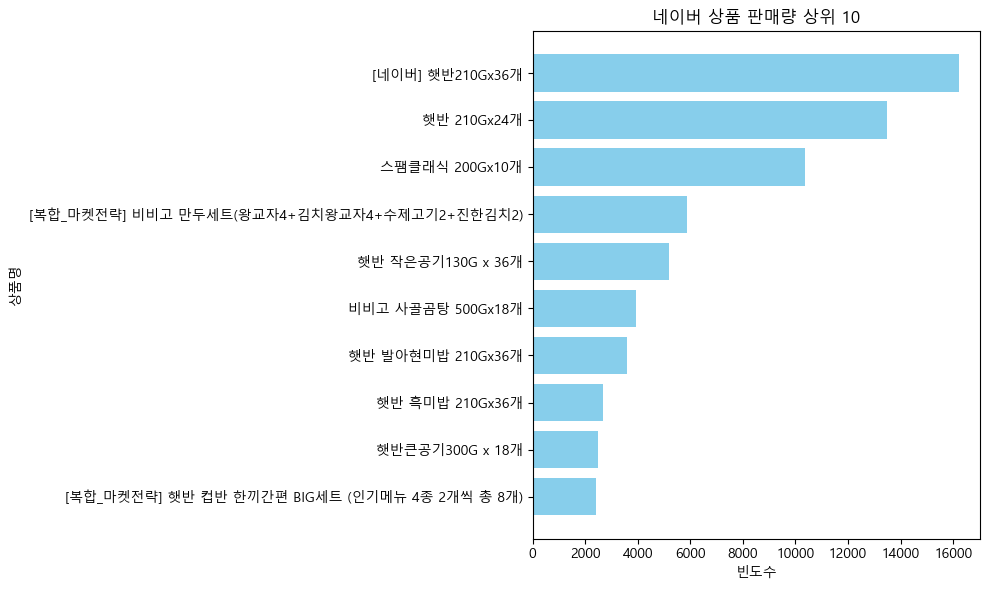

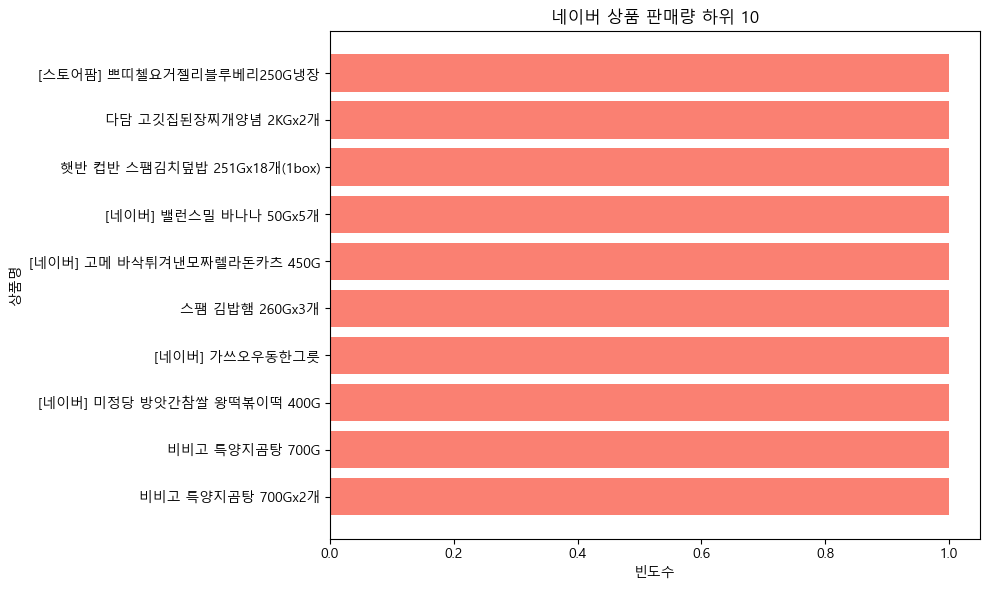

In [9]:
# 판매량 시각화

# 한글 폰트 설정
font_path = "C:\\Windows\\Fonts\\malgun.ttf"  # "맑은 고딕" 폰트 파일 경로
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 판매량 상위 10개 상품의 빈도수를 계산
item_counts_top_10 = df['상품명'].value_counts().nlargest(10)

# 판매량 하위 10개 상품의 빈도수를 계산
item_counts_bottom_10 = df['상품명'].value_counts().nsmallest(10)

# 상위 10개 상품의 정보를 추출
sorted_items_top_10 = item_counts_top_10.reset_index()
sorted_items_top_10.columns = ['상품명', '빈도수']

# 하위 10개 상품의 정보를 추출
sorted_items_bottom_10 = item_counts_bottom_10.reset_index()
sorted_items_bottom_10.columns = ['상품명', '빈도수']

# 빈도수가 높은 순서대로 상위 10개 상품
plt.figure(figsize=(10, 6))
plt.barh(sorted_items_top_10['상품명'], sorted_items_top_10['빈도수'], color='skyblue')
plt.xlabel('빈도수')
plt.ylabel('상품명')
plt.title('네이버 상품 판매량 상위 10')
plt.gca().invert_yaxis()  
plt.tight_layout()  
plt.show()

# 빈도수가 낮은 순서대로 하위 10개 상품
plt.figure(figsize=(10, 6))
plt.barh(sorted_items_bottom_10['상품명'], sorted_items_bottom_10['빈도수'], color='salmon')
plt.xlabel('빈도수')
plt.ylabel('상품명')
plt.title('네이버 상품 판매량 하위 10')
plt.gca().invert_yaxis()  
plt.tight_layout()  
plt.show()